In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [17]:
X = dataset.iloc[:, 1:-1].values

In [22]:
X.shape

(10, 1)

In [23]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [19]:
y = dataset.iloc[:,-1].values

In [20]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [24]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [37]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [28]:
#Building a linear Regression model to compare the accuracy
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
#Polynomial Regressor
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [45]:
X_poly
#constant, X, X^2

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

In [46]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

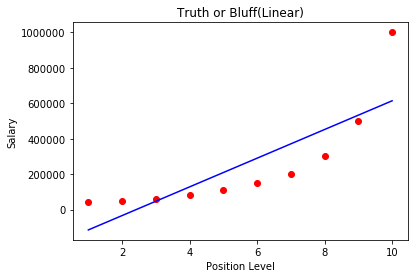

In [47]:
#visualizing the linear model
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff(Linear)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

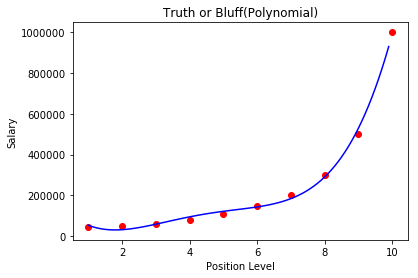

In [51]:
#visualizing the polynomial model
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff(Polynomial)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [53]:
#predicting what a 6.5 year employee would make using Linear
lin_reg.predict(6.5)

array([ 330378.78787879])

In [54]:
#predicting what a 6.5 year employee would make using Polynomial
lin_reg2.predict(poly_reg.fit_transform(6.5))

array([ 158862.45265153])